# Codebook Group Project

### Variables Extracted from Original Dataset
Participant:
- `agea` - Age of respondent, calculated
- `gndr` - Gender

Location 
- `region` - Region
- `cntry` - Country

Interview variables
- `inwdds` - Start of interview, day of month
- `inwmms` - Start of interview, month
- `inwyys` - Start of interview, year

Temperature variables:
- `tmpanod` - Temperature anomaly, date
- `tmpanocm` - Temperature anomaly, calendar month

Air quality:
- `aqiw2d` - Worst air quality index level across pollutants, last two days
- `ndyprwpm10` - Number of days with 'poor' air quality level or worse PM10, week before the date
- `ndyprwpm2_5` - Number of days with 'poor' air quality level or worse on PM2.5, week before the date

Opinion on climate change:
- `clmchng` - Do you think world's climate is changing
- `clmthgt1` - How much thought about climate change before today
- `clmthgt2` - How much thought about climate change before today
- `ccnthum` - Climate change caused by natural processes, human activity, or both
- `ccrdprs` - To what extent feel personal responsibility to reduce climate change
- `wrclmch` - How worried about climate change
- `ccgdbd` - Climate change good or bad impact across world


Variable descriptions were taken from the codebook (EOSC merged-EOSC-ESS8e02_2, edition 1.0; doi:10.21338/merged-EOSC-ESS8e02_2). 

In [4]:
import pandas as pd

# Read in file
csv_file_path = '/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/merged-EOSC-ESS8e02_2.csv'  

# List of relevant variables
columns = [
    'tmpanod', 'tmpanocm',
    'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5',
    'clmchng', 'clmthgt1', 'clmthgt2',
    'ccnthum', 'ccrdprs', 'wrclmch', 'ccgdbd',
    'cntry', 'region', # location
    'inwyys', 'inwmms', 'inwdds', #date
    'idno'
]

# Read the CSV and create the dataframe
try:
    df = pd.read_csv(csv_file_path, usecols=columns)
    print("Dataframe created successfully with the specified variables.")
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except ValueError as e:
    print(f"Error: {e}")

# Optional: Display dataframe information
print("\nDataframe Information:")
print(df.info())

Dataframe created successfully with the specified variables.
   idno cntry  clmchng  clmthgt1  clmthgt2  ccnthum  ccrdprs  wrclmch  ccgdbd  \
0     1    AT        1         6         4        4        8        4      10   
1     2    AT        1         6         4        4        7        4       2   
2     6    AT        2         6         3        3        6        3       7   
3    15    AT        2         6         3        2        7        3       5   
4    17    AT        1         6         4        5        7        4       1   

  region  inwdds  inwmms  inwyys  aqiw2d  ndyprwpm10  ndyprwpm2_5   tmpanod  \
0   AT13       5      12    2016       4           4            4 -2.841225   
1   AT13      25      11    2016       4           3            6  1.195207   
2   AT13      11      10    2016       1           1            0 -3.406717   
3   AT13      24      11    2016       3           3            6  1.189277   
4   AT13      21      11    2016       3           4     

### Identify uniqueness of row identicators

No uniqueness of ID & date, therefore, we will create own primary keys

In [5]:
df['date'] = pd.to_datetime(df[['inwyys', 'inwmms', 'inwdds']].rename(columns={'inwyys': 'year', 'inwmms': 'month', 'inwdds': 'day'}))

# Identify rows that are not unique in both ID and date
non_unique_rows = df[df.duplicated(subset=['idno', 'date'], keep=False)]

# Display the non-unique rows
non_unique_rows = non_unique_rows.sort_values(by='idno')
print(non_unique_rows)


      idno cntry  clmchng  clmthgt1  clmthgt2  ccnthum  ccrdprs  wrclmch  \
39     345    AT        2         6         1        3        5        2   
1992   345    NO        1         6         4        3        8        3   
453   1369    BE        1         6         4        4       10        5   
2112  1369    NO        1         6         5        4        7        4   
688   2062    CZ        1         6         2        4        1        3   
2183  2062    NO        2         6         3        3       10        3   
713   2096    CZ        2         6         3        3        2        3   
2192  2096    NO        2         6         3        3        5        3   
302   3034    AT        1         6         5        4        9        4   
547   3034    BE        1         6         3        4        7        3   

      ccgdbd region  inwdds  inwmms  inwyys  aqiw2d  ndyprwpm10  ndyprwpm2_5  \
39         4   AT13      29      11    2016       2           4            4   
199

### Create subset and tables

Step 1:
We read in the csv file again with updated columns.

Step 2:
Creating IDs for different data

Step 3:
Creating individual tables since PostSql cannot extract from the whole table

In [ ]:
# Load the CSV file from previously assigned file path
df = pd.read_csv(csv_file_path)

# Creating a copy to store data with individual id's
data_storage = df.copy()

# Creating IDs for individual tables
data_storage['participant_id'] = data_storage.index + 1
data_storage['interview_id'] = data_storage.index + 1
data_storage['temperature_id'] = data_storage.index + 1
data_storage['air_quality_id'] = data_storage.index + 1
data_storage['opinions_id'] = data_storage.index + 1


# Select only the relevant columns
relevant_columns = ['region', 'cntry', # location
                    'participant_id', 'gndr', 'agea', # participant
                    'interview_id', 'inwdds', 'inwmms', 'inwyys', # interview date
                    'temperature_id', 'tmpanod', 'tmpanocm', # temperature
                    'air_quality_id', 'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5', # air quality
                    'opinions_id', 'clmchng', 'clmthgt1', 'clmthgt2', 'ccnthum', 'ccrdprs', 'wrclmch', 'ccgdbd'] # opinion variables
data_storage = data_storage[relevant_columns]


# Creating subtables
output_dir = '/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/'

# Define the columns for each table
tables = {
    # Locations table stores unique regions and countries
    "locations": ["region", "cntry"],  # Primary key: region

    # Participants table links participants to their demographics and region
    "participants": ["participant_id", "gndr", "agea", "region"],  # Primary key: participant_id
    # Foreign key: region references locations(region)

    # Interviews table links participants to their interviews and external factors
    "interviews": [
        "interview_id",  # Primary key
        "participant_id",  # Foreign key references participants(participant_id)
        "inwdds", "inwmms", "inwyys",  # Interview date details
        "temperature_id",  # Foreign key references temperature(temperature_id)
        "air_quality_id",  # Foreign key references air_quality(air_quality_id)
        "opinions_id"  # Foreign key references climate_change_opinions(opinions_id)
    ],

    # Temperature table stores temperature-related metrics
    "temperature": [
        "temperature_id",  # Primary key
        "tmpanod", "tmpanocm"  # Temperature variables
    ],

    # Air Quality table stores air quality metrics
    "air_quality": [
        "air_quality_id",  # Primary key
        "aqiw2d", "ndyprwpm10", "ndyprwpm2_5"  # Air quality variables
    ],

    # Climate Change Opinions table stores opinions on climate change
    "climate_change_opinions": [
        "opinions_id",  # Primary key
        "interview_id",  # Foreign key references interviews(interview_id)
        "clmchng", "clmthgt1", "clmthgt2", "ccnthum", "ccrdprs", "wrclmch", "ccgdbd"
    ]
}

# Create individual CSV files for each table
for table, columns in tables.items():
    try:
        # Select only the required columns for the table
        table_data = data_storage[columns]

        # Keep only unique rows if the table is "locations"
        if table == "locations":
            table_data = table_data.drop_duplicates()
       
        # Save to CSV
        output_file = f"{output_dir}{table}.csv"
        table_data.to_csv(output_file, index=False)
        print(f"Saved {table} to {output_file}")
        
    except KeyError as e:
        print(f"Error: Some columns are missing for {table}: {e}")     
print("Finished creating individual CSV files.")


Saved locations to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/locations.csv
Saved participants to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/participants.csv
Saved interviews to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/interviews.csv
Saved temperature to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/temperature.csv
Saved air_quality to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/air_quality.csv
Saved climate_change_opinions to /Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/climate_change_opinions.

### Preparing for Data Analysis: Joining tables again

In [19]:
# Read in individual tables
locations = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/locations.csv') 
participants = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/participants.csv') 
interviews = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/interviews.csv') 
temperature = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/temperature.csv') 
air_quality = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/air_quality.csv') 
climate_change_opinions = pd.read_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/merged-EOSC-ESS8e02_2/climate_change_opinions.csv') 

# Step 1: Merge interviews with participants on participant_id
df = pd.merge(interviews, participants, on="participant_id", how="left")

# Step 2: Merge the resulting DataFrame with locations on region
df = pd.merge(df, locations, on="region", how="left")

# Step 3: Merge with temperature on temperature_id
df = pd.merge(df, temperature, on="temperature_id", how="left")

# Step 4: Merge with air_quality on air_quality_id
df = pd.merge(df, air_quality, on="air_quality_id", how="left")

# Step 5: Merge with climate_change_opinions on opinions_id
df = pd.merge(df, climate_change_opinions, on="opinions_id", how="left")


# Creating the date variable from day, month, and year
df['date'] = pd.to_datetime(df[['inwyys', 'inwmms', 'inwdds']].rename(columns={'inwyys': 'year', 'inwmms': 'month', 'inwdds': 'day'}))
df = df.drop(columns=['inwyys', 'inwmms', 'inwdds'])

## Data Analysis

For the data analysis, we will select specific columns from the whole dataframe

In [ ]:
# Select only the relevant columns for data analysis
relevant_columns = ['region', 'cntry', # location
                    'gndr', 'agea', 'region', # participant
                    'tmpanod', 'tmpanocm', # temperature
                    'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5', # air quality
                    'clmchng', 'clmthgt1', 'clmthgt2', 'ccnthum', 'ccrdprs', 'wrclmch', 'ccgdbd'] # opinion
df_relevant = df[relevant_columns]

# Save the filtered CSV file
df_relevant.to_csv('/Users/paulsedlmayr/Library/CloudStorage/OneDrive-UniversitätGraz/UNI/A TUG/A Datenbanken/Group_project/filtered_EOSC.csv', index=False)

print(df_relevant.columns)


Index(['region', 'cntry', 'gndr', 'agea', 'region', 'tmpanod', 'tmpanocm',
       'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5', 'clmchng', 'clmthgt1',
       'clmthgt2', 'ccnthum', 'ccrdprs', 'wrclmch', 'ccgdbd'],
      dtype='object')


## Plotting the columns to examine suitability 

In [21]:
# Display the first rows of the dataframe
print("First 5 Rows of the Dataframe:")
print(df.head(), "\n")

# Display summary statistics
print("Summary Statistics:")
print(df.describe(include='all'), "\n")



First 5 Rows of the Dataframe:
   interview_id_x  participant_id  temperature_id  air_quality_id  \
0               1               1               1               1   
1               2               2               2               2   
2               3               3               3               3   
3               4               4               4               4   
4               5               5               5               5   

   opinions_id  gndr  agea region cntry   tmpanod  ...  ndyprwpm2_5  \
0            1     2    34   AT13    AT -2.841225  ...            4   
1            2     1    52   AT13    AT  1.195207  ...            6   
2            3     1    54   AT13    AT -3.406717  ...            0   
3            4     2    41   AT13    AT  1.189277  ...            6   
4            5     1    61   AT13    AT  6.583641  ...            6   

   interview_id_y  clmchng  clmthgt1  clmthgt2  ccnthum  ccrdprs  wrclmch  \
0               1        1         6         4    

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Dictionary mapping column names to their descriptive labels
variable_labels = {
    'tmpanod': 'Temperature Anomaly, Date',
    'tmpanocm': 'Temperature Anomaly, Calendar Month',
    'aqiw2d': 'Worst Air Quality Index Level Across Pollutants (Last 2 Days)',
    'ndyprwpm10': "Number of Days with 'Poor' Air Quality Level or Worse PM10 (Week Before)",
    'ndyprwpm2_5': "Number of Days with 'Poor' Air Quality Level or Worse PM2.5 (Week Before)",
    'clmchng': "Do You Think World's Climate is Changing",
    'clmthgt1': "How Much Thought About Climate Change Before Today (1)",
    'clmthgt2': "How Much Thought About Climate Change Before Today (2)",
    'ccnthum': "Climate Change Caused by Natural Processes, Human Activity, or Both",
    'ccrdprs': "To What Extent You Feel Personal Responsibility to Reduce Climate Change",
    'wrclmch': "How Worried Are You About Climate Change",
    'ccgdbd': "Climate Change: Good or Bad Impact Across the World",
    'cntry': 'Country',
    'region': 'Region'
}

# Create subplots
plt.figure(figsize=(cols * 6, rows * 4)) 
for i, column in enumerate(columns, 1):
    plt.subplot(rows, cols, i)
    
    # Plotting based on data type
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
    else:
        sns.countplot(y=df[column], palette='viridis')
    
    # Combine column name and description in the title
    title = f"{column}\n{variable_labels[column]}"
    plt.title(title, fontsize=10, weight='bold')
    
    plt.xlabel('')
    plt.ylabel('')
    
    # Adjust layout for categorical variables if necessary
    if df[column].dtype not in ['int64', 'float64']:
        plt.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title if needed
plt.show()


NameError: name 'rows' is not defined

<Figure size 640x480 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

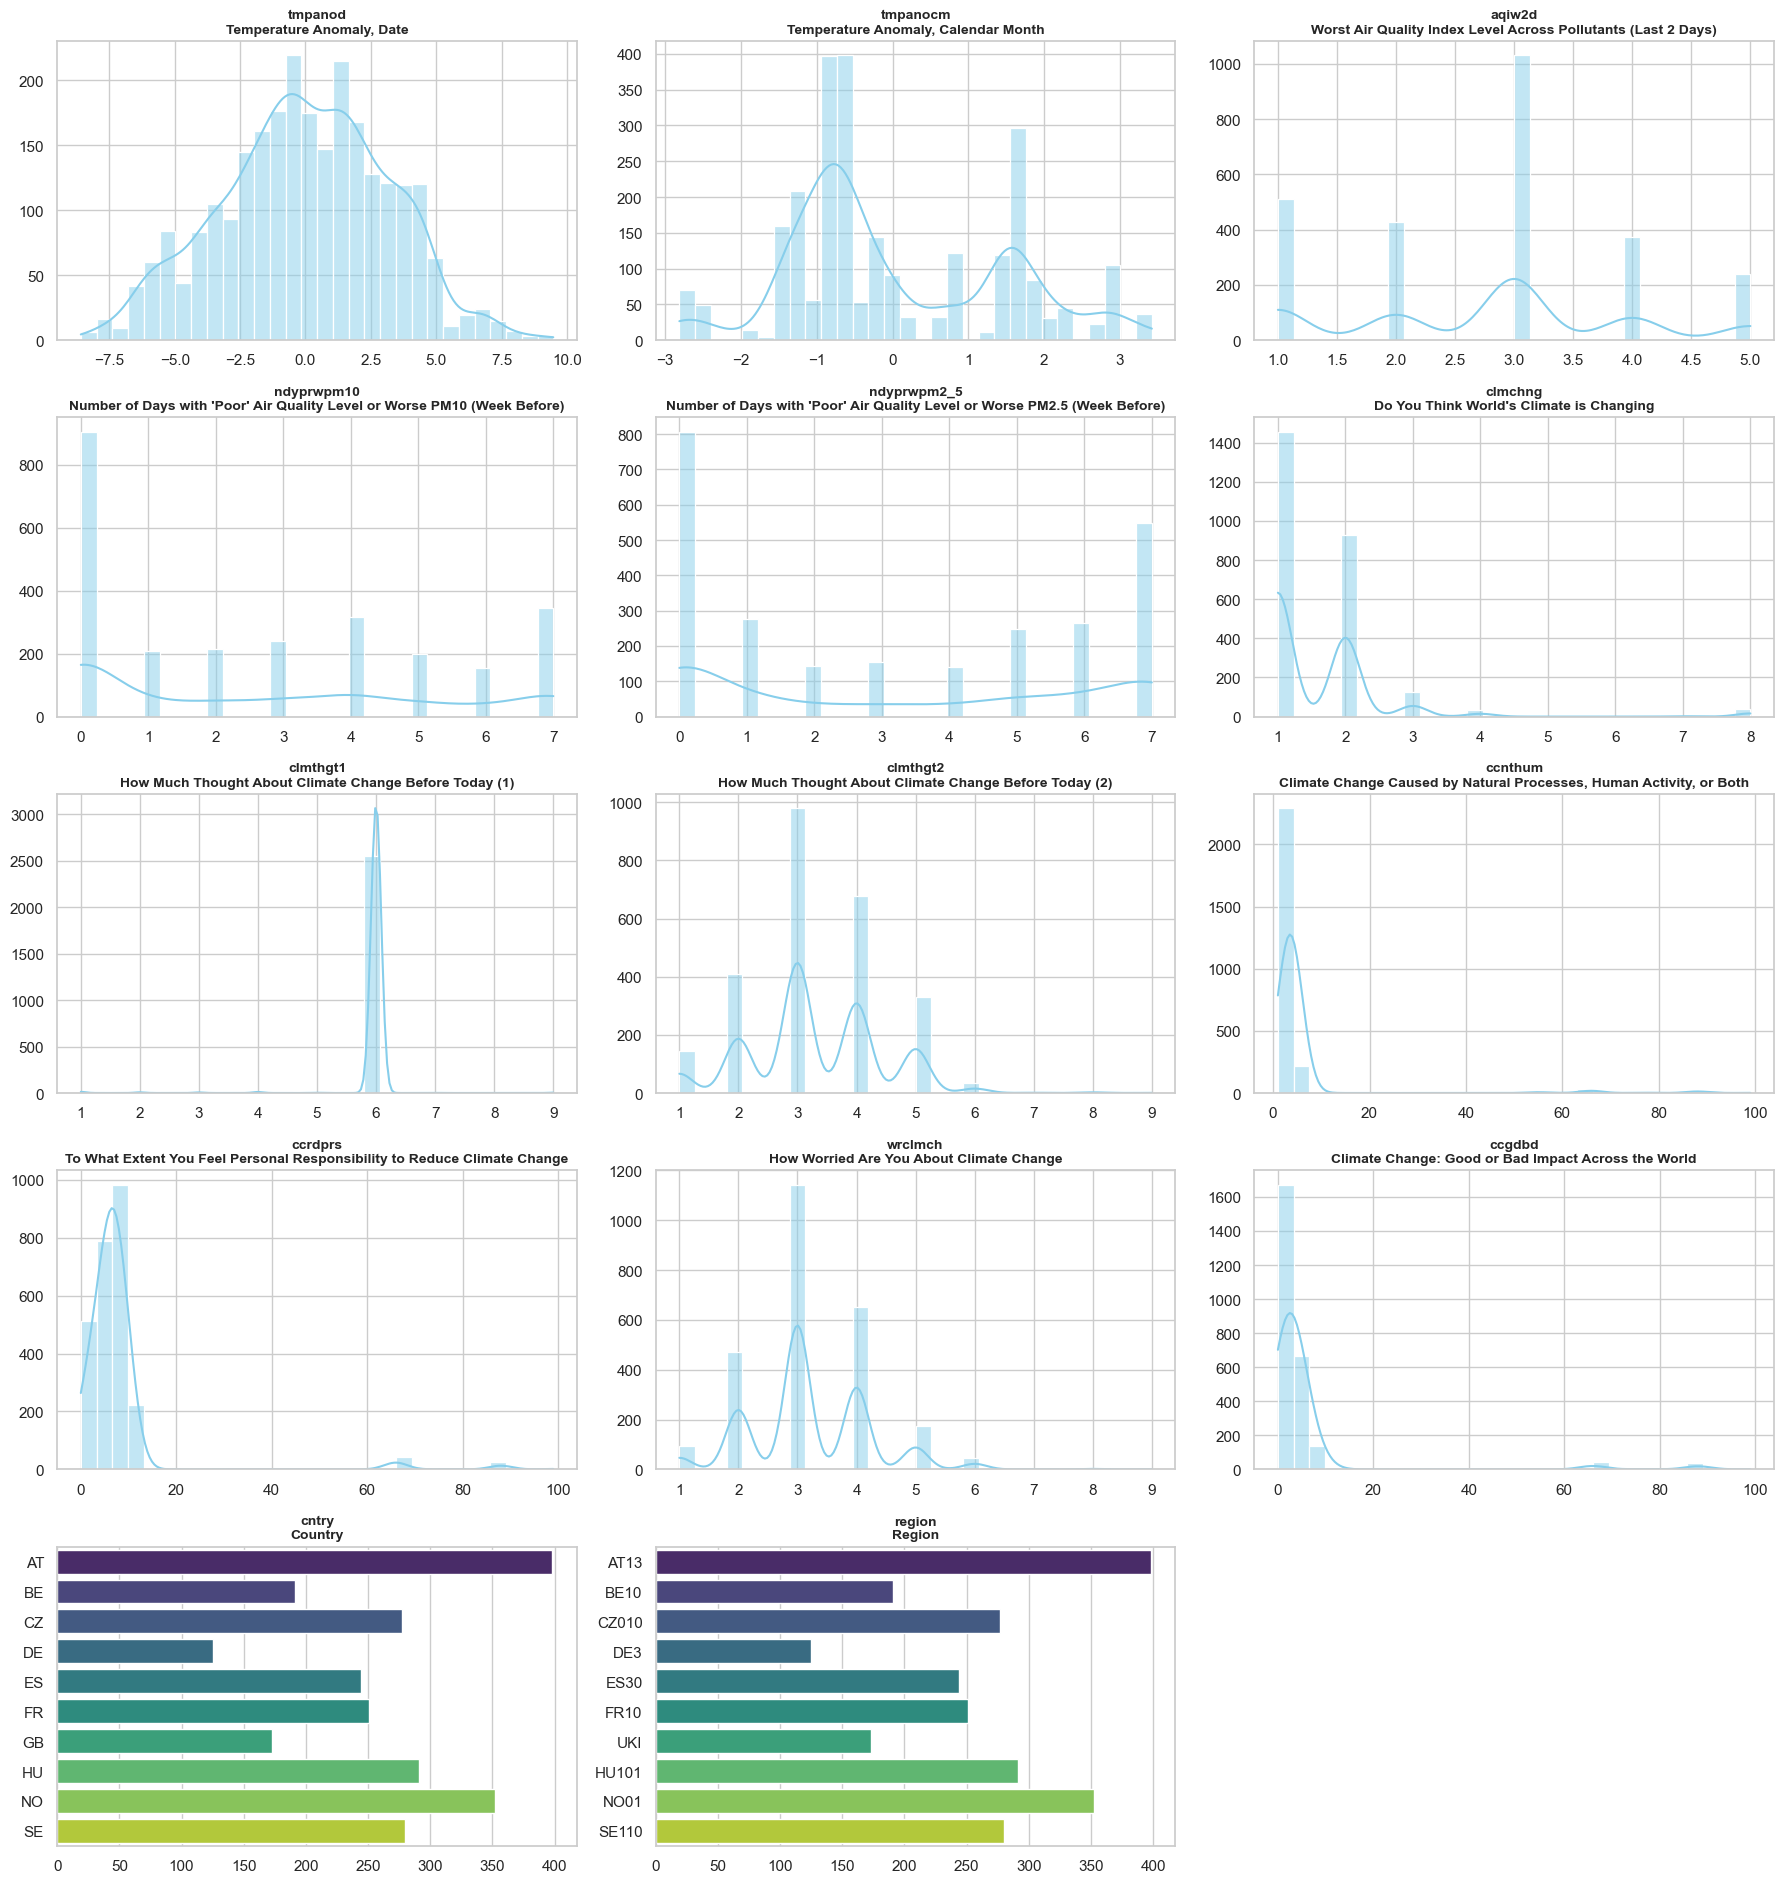

In [24]:

# Ensure all columns are in the DataFrame
columns = list(variable_labels.keys())
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"Warning: The following columns are missing from the DataFrame and will be skipped: {missing_columns}")
    columns = [col for col in columns if col in df.columns]

# Determine the number of rows and columns for subplots
cols = 3  # Number of columns for subplots
rows = -(-len(columns) // cols)  # Calculate rows needed for given columns

# Create subplots
plt.figure(figsize=(cols * 6, rows * 4))  # Dynamic figure size based on rows and cols
for i, column in enumerate(columns, 1):
    plt.subplot(rows, cols, i)
    
    # Plotting based on data type
    if df[column].dtype in ['int64', 'float64']:
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
    else:
        sns.countplot(y=df[column].dropna(), palette='viridis')
    
    # Combine column name and description in the title
    title = f"{column}\n{variable_labels.get(column, 'No Label Available')}"
    plt.title(title, fontsize=10, weight='bold')
    
    plt.xlabel('')  # Remove x-axis labels
    plt.ylabel('')  # Remove y-axis labels

    # Adjust layout for categorical variables if necessary
    if df[column].dtype not in ['int64', 'float64']:
        plt.tight_layout()

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title if needed
plt.show()

## Choosing a subset of columns

Criteria: 
- Different answers should be present in the question
- Distribution should not be extremely skewed (as in `ccgdbd` - Climate change good or bad impact across world)

Choosing 
- `wrclmch` - How worried about climate change
- `clmchng` - Do you think world's climate is changing
- `clmthgt2` - How much thought about climate change before today

Temperature variables:
- `tmpanod` - Temperature anomaly, date
- `tmpanocm` - Temperature anomaly, calendar month

Air quality:
- `aqiw2d` - Worst air quality index level across pollutants, last two days
- `ndyprwpm10` - Number of days with 'poor' air quality level or worse PM10, week before the date
- `ndyprwpm2_5` - Number of days with 'poor' air quality level or worse on PM2.5, week before the date

In [26]:

# Selecting a subset of columns
# Define the subset of columns you want to select
subset_columns = [
    'tmpanod', 'tmpanocm', # temperature anomaly
    'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5', # air quality
    'clmchng', 'clmthgt2', 'wrclmch' # climate change attitudes
]

# Create a new dataframe with the subset of columns
df_subset = df[subset_columns]

# Define climate variables
climate_vars = ['clmchng', 'clmthgt2', 'wrclmch']

# Display initial row count
print(f"Initial rows: {df_subset.shape[0]}")

# Filter out rows with any climate variable > 5 (-> values not important for anaylsis; see codebook
df_subset_filtered = df_subset[df_subset[climate_vars].le(5).all(axis=1)].reset_index(drop=True)

# Display filtered row count
print(f"Rows after filtering: {df_subset_filtered.shape[0]}")

# overwrite the original dataframe
df_subset = df_subset_filtered

print("Subset of Dataframe:")
print(df_subset.head(), "\n")

# Optionally, display summary statistics for the subset
print("Summary Statistics for Subset:")
print(df_subset.describe(include='all'))

Initial rows: 2582
Rows after filtering: 2493
Subset of Dataframe:
    tmpanod  tmpanocm  aqiw2d  ndyprwpm10  ndyprwpm2_5  clmchng  clmthgt2  \
0 -2.841225  0.023351       4           4            4        1         4   
1  1.195207 -0.574942       4           3            6        1         4   
2 -3.406717 -0.788132       1           1            0        2         3   
3  1.189277 -0.574942       3           3            6        2         3   
4  6.583641 -0.574942       3           4            6        1         4   

   wrclmch  
0        4  
1        4  
2        3  
3        3  
4        4   

Summary Statistics for Subset:
           tmpanod     tmpanocm       aqiw2d   ndyprwpm10  ndyprwpm2_5  \
count  2493.000000  2493.000000  2493.000000  2493.000000  2493.000000   
mean     -0.033202     0.022991     2.756518     2.660249     3.163257   
std       3.201007     1.443440     1.193752     2.548190     2.823354   
min      -8.596486    -2.811421     1.000000     0.000000     0

### Visually Examine Relationship

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

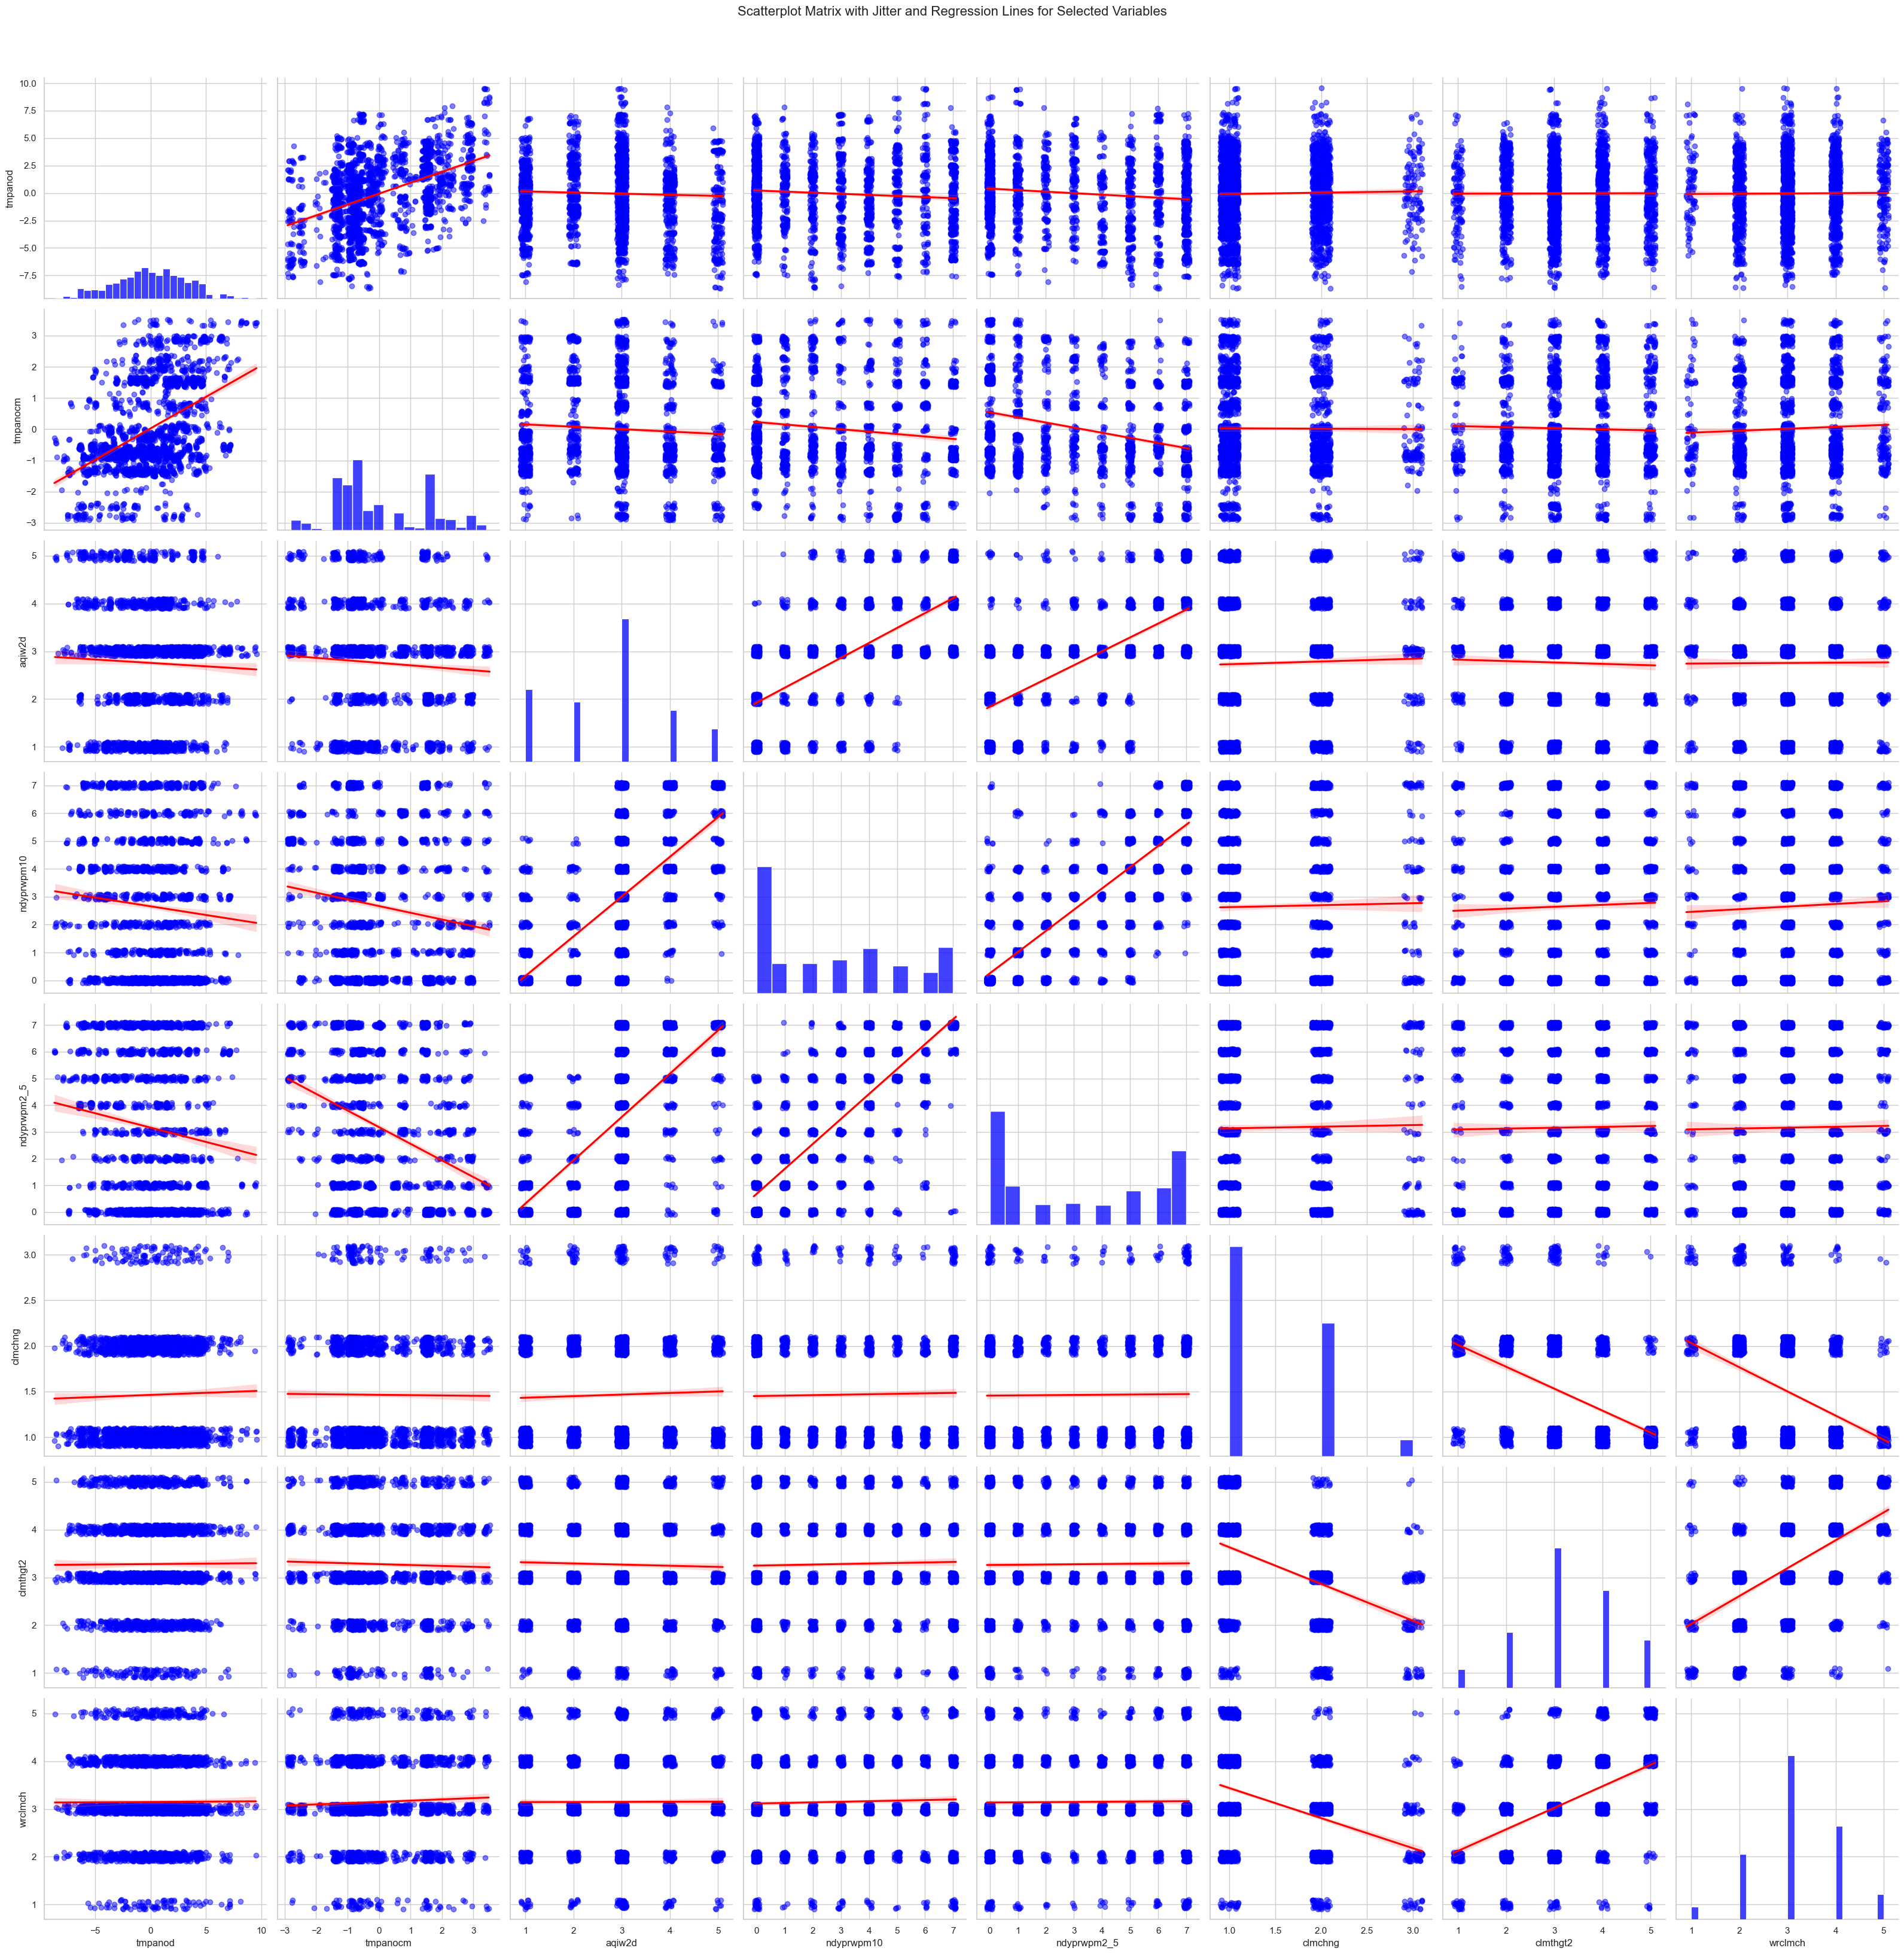

In [33]:
import numpy as np
# Function to add jitter and plot regression lines
def scatter_jitter(x, y, **kwargs):
    jitter_strength = 0.1  # Adjust the strength of jitter as needed
    x_jitter = x + np.random.uniform(-jitter_strength, jitter_strength, size=len(x))
    y_jitter = y + np.random.uniform(-jitter_strength, jitter_strength, size=len(y))
    sns.regplot(x=x_jitter, y=y_jitter, **kwargs)

# Create a PairGrid with increased size to zoom out
g = sns.PairGrid(df_subset, height=4)  # Increased height for zooming out

# Map the scatter plots with jitter and regression lines to the upper and lower triangles
g.map_upper(scatter_jitter, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})
g.map_lower(scatter_jitter, scatter_kws={'alpha':0.5, 'color':'blue'}, line_kws={'color':'red'})

# Map histograms to the diagonal
g.map_diag(sns.histplot, kde=False, color='blue')

# Add an overall title
plt.suptitle('Scatterplot Matrix with Jitter and Regression Lines for Selected Variables', fontsize=16, y=1.02)

# Adjust layout to accommodate the title
plt.tight_layout()
plt.show()

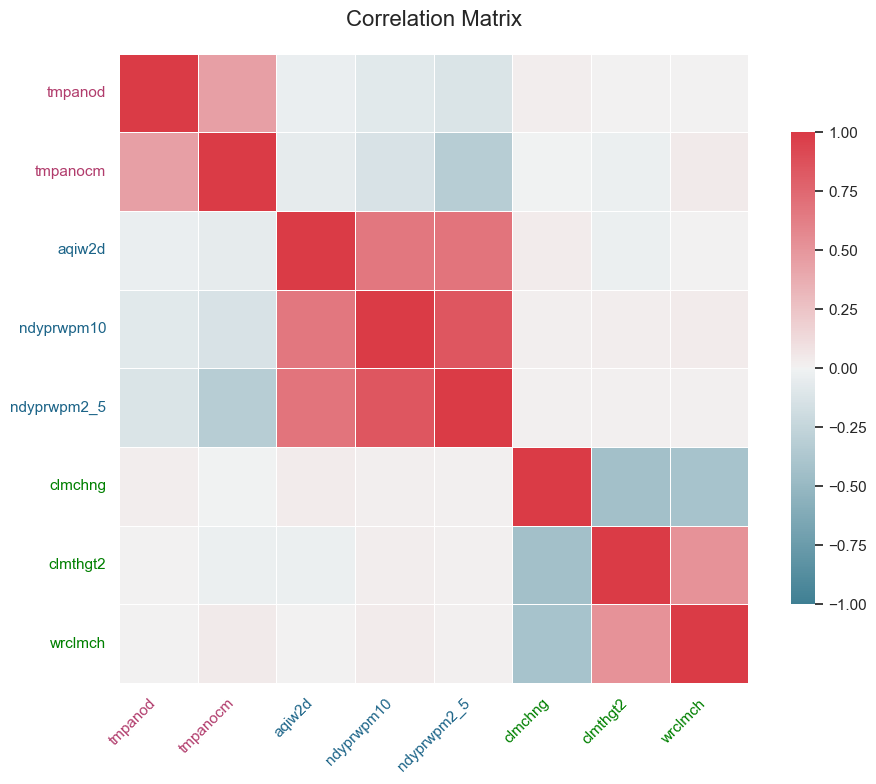

In [32]:
# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Adjust the size as needed

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Define categories and their colors
label_colors = {
    'weather': sns.color_palette("flare")[3],  # Red from the "flare" palette
    'air': sns.color_palette("crest")[4],      # Blue from the "crest" palette
    'climate_change': 'green'
}

# Categorize variables
variable_categories = {
    'tmpanod': 'weather',
    'tmpanocm': 'weather',
    'aqiw2d': 'air',
    'ndyprwpm10': 'air',
    'ndyprwpm2_5': 'air',
    'clmchng': 'climate_change',
    'clmthgt1': 'climate_change',
    'clmthgt2': 'climate_change',
    'ccnthum': 'climate_change',
    'ccrdprs': 'climate_change',
    'wrclmch': 'climate_change',
    'ccgdbd': 'climate_change'
}
# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=False,
    fmt=".2f",
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .75}
)

# Customize tick labels
ax = plt.gca()  # Get the current axes

# Update x-axis labels
for label in ax.get_xticklabels():
    var_name = label.get_text()
    category = variable_categories.get(var_name, None)
    color = label_colors.get(category, 'black')  # Default to black if category not found
    label.set_color(color)

# Update y-axis labels
for label in ax.get_yticklabels():
    var_name = label.get_text()
    category = variable_categories.get(var_name, None)
    color = label_colors.get(category, 'black')  # Default to black if category not found
    label.set_color(color)

# Add title and adjust layout
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Adjust layout to prevent clipping
plt.show()

In [34]:
import statsmodels.api as sm


# Define the dependent and independent variables
X = df_subset_filtered['tmpanod']
y = df_subset_filtered['wrclmch']

# Add a constant term to the independent variable (for intercept)
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the regression model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                wrclmch   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.09882
Date:                Wed, 18 Dec 2024   Prob (F-statistic):              0.753
Time:                        14:58:41   Log-Likelihood:                -3314.2
No. Observations:                2493   AIC:                             6632.
Df Residuals:                    2491   BIC:                             6644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1469      0.018    171.765      0.0

## Plot climate attitudes across regions

In [40]:
# List of relevant variables
columns = [
    'tmpanod', 'tmpanocm',
    'aqiw2d', 'ndyprwpm10', 'ndyprwpm2_5',
    'ndyprwpm10',
    'impenv',
    'clmchng', 'clmthgt2', 'wrclmch',
    'region'
]

# Read the CSV and create the dataframe
try:
    df_subset_filtered = pd.read_csv(csv_file_path, usecols=columns)
    print("Dataframe created successfully with the specified variables.")
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
except ValueError as e:
    print(f"Error: {e}")


Dataframe created successfully with the specified variables.
   interview_id_x  participant_id  temperature_id  air_quality_id  \
0               1               1               1               1   
1               2               2               2               2   
2               3               3               3               3   
3               4               4               4               4   
4               5               5               5               5   

   opinions_id  gndr  agea region cntry   tmpanod  ...  ndyprwpm2_5  \
0            1     2    34   AT13    AT -2.841225  ...            4   
1            2     1    52   AT13    AT  1.195207  ...            6   
2            3     1    54   AT13    AT -3.406717  ...            0   
3            4     2    41   AT13    AT  1.189277  ...            6   
4            5     1    61   AT13    AT  6.583641  ...            6   

   interview_id_y  clmchng  clmthgt1  clmthgt2  ccnthum  ccrdprs  wrclmch  \
0               1   

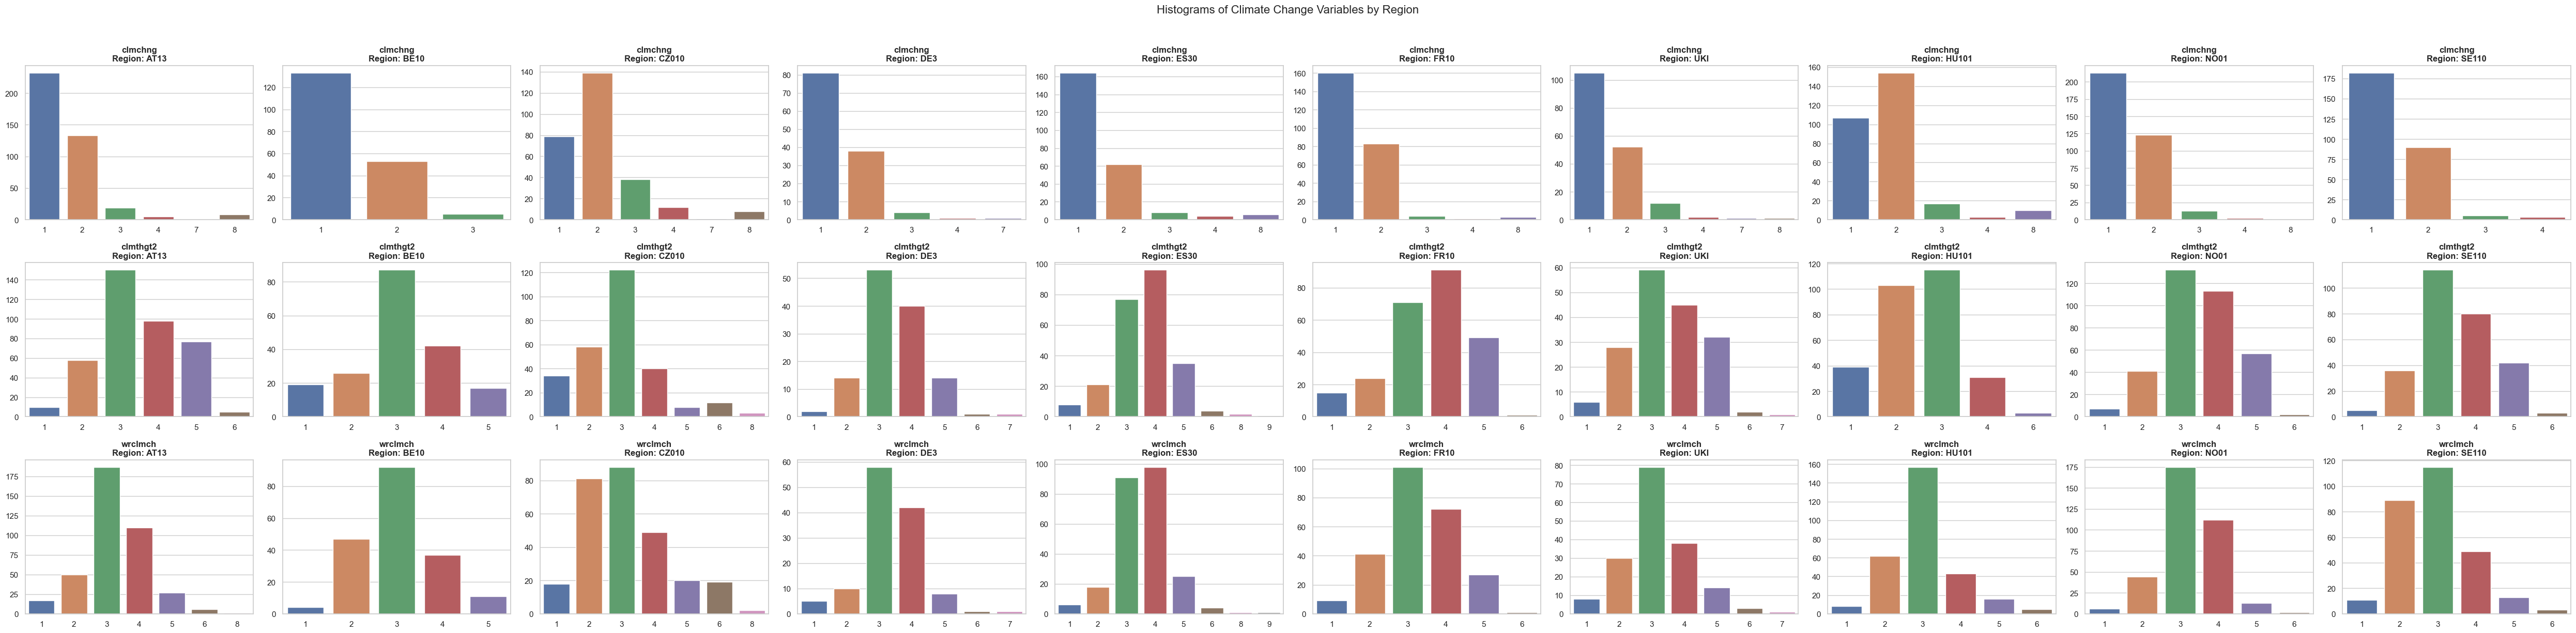

In [41]:
# Get unique regions
regions = df_subset_filtered['region'].unique()
num_regions = len(regions)

# Set the style for seaborn
sns.set(style="whitegrid")

# Define the number of climate variables
num_vars = len(climate_vars)

# Create a figure with subplots: rows = climate variables, columns = regions
fig, axes = plt.subplots(nrows=num_vars, ncols=num_regions, figsize=(5*num_regions, 4*num_vars), sharex=False, sharey=False)

# Iterate over climate variables and regions to plot histograms
for row, var in enumerate(climate_vars):
    for col, region in enumerate(regions):
        ax = axes[row, col] if num_vars > 1 and num_regions > 1 else axes[max(row, col)]
        sns.countplot(
            data=df_subset_filtered[df_subset_filtered['region'] == region],
            x=var,
            ax=ax
        )
        ax.set_title(f"{var}\nRegion: {region}", fontsize=12, weight='bold')
        ax.set_xlabel('')
        ax.set_ylabel('')
        
# Adjust layout and add an overall title
plt.suptitle('Histograms of Climate Change Variables by Region', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()